In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [121]:
xytick_font = 18
xylabel_font = 24
legend_font = 16

In [122]:
path = "/datassd/pipeline/client_tiled/pipeline_new/output/"

seq_names = [f"160906_band2", f"170307_dance5", f"170915_office1", f"160906_pizza1", f"170915_toddler4"]
seq_names_short = ["band2", "dance5", "office1", "pizza1", "toddler4"]

trace_names = ["tracep1", "wifi25"]

In [123]:

data_dict = {}
for trace_name in trace_names:
    data_dict[trace_name] = {}
    for seq_name, seq_name_short in zip(seq_names, seq_names_short):
        df_livo_nocull = pd.read_csv(os.path.join(path, f"{seq_name}_{trace_name}_livo_nocull_fps.txt"))
        df_livo = pd.read_csv(os.path.join(path, f"{seq_name}_{trace_name}_livo_fps.txt"))

        df_livo_nocull = df_livo_nocull[df_livo_nocull["FrameID"] > 100]
        df_livo = df_livo[df_livo["FrameID"] > 100]
        data_dict[trace_name][seq_name] = {
            "mean_livo_nocull": df_livo_nocull["FPS"].mean(),
            "std_livo_nocull": df_livo_nocull["FPS"].std(),
            "mean_livo": df_livo["FPS"].mean(),
            "std_livo": df_livo["FPS"].std()
        }

        

In [124]:
data_dict

{'tracep1': {'160906_band2': {'mean_livo_nocull': 28.178327333333332,
   'std_livo_nocull': 4.122430485564101,
   'mean_livo': 30.33101552680219,
   'std_livo': 1.1055088518746874},
  '170307_dance5': {'mean_livo_nocull': 29.99745830366491,
   'std_livo_nocull': 3.0657142939663533,
   'mean_livo': 30.306685642062597,
   'std_livo': 1.211265287113142},
  '170915_office1': {'mean_livo_nocull': 29.87938813999996,
   'std_livo_nocull': 4.197515610916166,
   'mean_livo': 30.295613186813146,
   'std_livo': 0.9015317993191301},
  '160906_pizza1': {'mean_livo_nocull': 28.489498317757008,
   'std_livo_nocull': 6.631546076166821,
   'mean_livo': 29.06686946564885,
   'std_livo': 2.496242180093082},
  '170915_toddler4': {'mean_livo_nocull': 30.35456070460704,
   'std_livo_nocull': 1.7571431904640178,
   'mean_livo': 30.304747837837812,
   'std_livo': 0.690246154873611}},
 'wifi25': {'160906_band2': {'mean_livo_nocull': 27.72254615087037,
   'std_livo_nocull': 4.540941477849363,
   'mean_livo': 29

In [125]:
colors = [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)]

/tmp/ipykernel_1112452/116976856.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(0, 36, 5), fontsize=xytick_font)


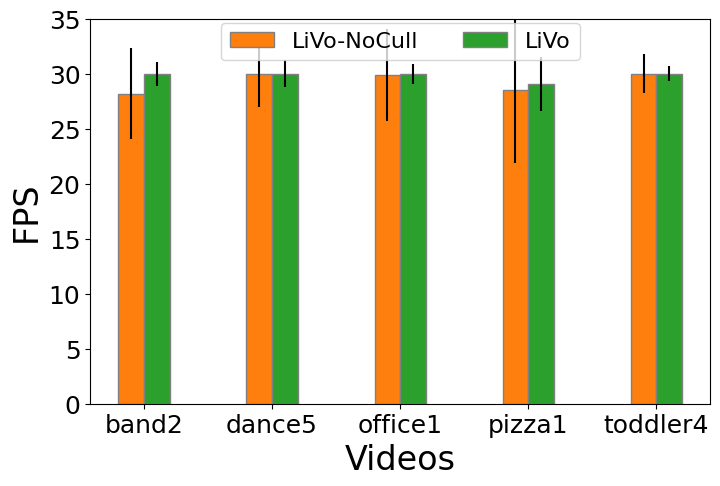

In [126]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

bar_width = 0.2
r1 = np.arange(len(seq_names))
r2 = [x + bar_width for x in r1]

trace_name = "tracep1"
mean_livo_nocull = [data_dict[trace_name][seq_name]["mean_livo_nocull"] for seq_name in seq_names]
std_livo_nocull = [data_dict[trace_name][seq_name]["std_livo_nocull"] for seq_name in seq_names]
mean_livo = [data_dict[trace_name][seq_name]["mean_livo"] for seq_name in seq_names]
std_livo = [data_dict[trace_name][seq_name]["std_livo"] for seq_name in seq_names]

for i in range(len(mean_livo)):
    if mean_livo[i] > 30:
        mean_livo[i] = 30

for i in range(len(mean_livo_nocull)):
    if mean_livo_nocull[i] > 30:
        mean_livo_nocull[i] = 30

ax.bar(r1, mean_livo_nocull, yerr=std_livo_nocull, color=colors[1], width=bar_width, edgecolor='grey', label='LiVo-NoCull')
ax.bar(r2, mean_livo, yerr=std_livo, color=colors[2], width=bar_width, edgecolor='grey', label='LiVo')

ax.set_xticks([r + bar_width/2 for r in range(len(seq_names))])
ax.set_xticklabels(seq_names_short, fontsize=xytick_font)
ax.set_yticklabels(np.arange(0, 36, 5), fontsize=xytick_font)
ax.set_ylim(0, 35)
ax.set_ylabel("FPS", fontsize=xylabel_font)
ax.set_xlabel("Videos", fontsize=xylabel_font)
ax.legend(loc='upper center',ncol=3, bbox_to_anchor=(0.5, 1.019), fontsize=legend_font)
plt.show()

# save figure to pdf
fig.savefig("/home/lei/rajrup/KinectStream/Scripts/Experiments/output/plots/fps_tracep1.pdf", bbox_inches='tight')

/tmp/ipykernel_1112452/239243925.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(0, 36, 5), fontsize=xytick_font)


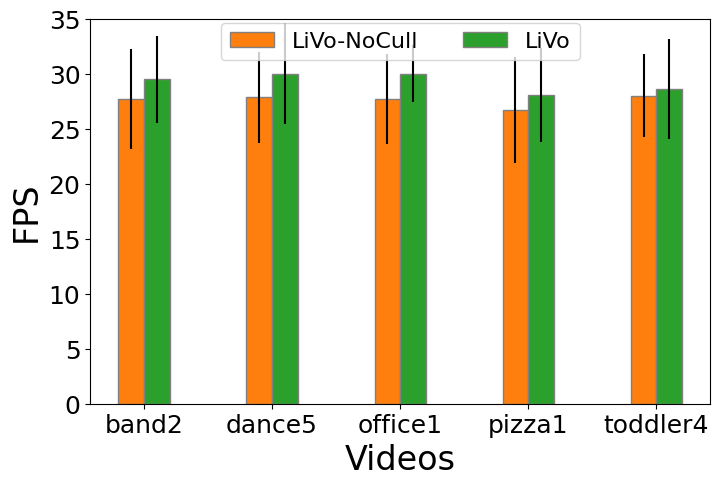

In [127]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

bar_width = 0.2
r1 = np.arange(len(seq_names))
r2 = [x + bar_width for x in r1]

trace_name = "wifi25"
mean_livo_nocull = [data_dict[trace_name][seq_name]["mean_livo_nocull"] for seq_name in seq_names]
std_livo_nocull = [data_dict[trace_name][seq_name]["std_livo_nocull"] for seq_name in seq_names]
mean_livo = [data_dict[trace_name][seq_name]["mean_livo"] for seq_name in seq_names]
std_livo = [data_dict[trace_name][seq_name]["std_livo"] for seq_name in seq_names]

for i in range(len(mean_livo)):
    if mean_livo[i] > 30:
        mean_livo[i] = 30

for i in range(len(mean_livo_nocull)):
    if mean_livo_nocull[i] > 30:
        mean_livo_nocull[i] = 30

ax.bar(r1, mean_livo_nocull, yerr=std_livo_nocull, color=colors[1], width=bar_width, edgecolor='grey', label='LiVo-NoCull')
ax.bar(r2, mean_livo, yerr=std_livo, color=colors[2], width=bar_width, edgecolor='grey', label='LiVo')

ax.set_xticks([r + bar_width/2 for r in range(len(seq_names))])
ax.set_xticklabels(seq_names_short, fontsize=xytick_font)
ax.set_yticklabels(np.arange(0, 36, 5), fontsize=xytick_font)
ax.set_ylim(0, 35)
ax.set_ylabel("FPS", fontsize=xylabel_font)
ax.set_xlabel("Videos", fontsize=xylabel_font)
ax.legend(loc='upper center',ncol=3, bbox_to_anchor=(0.5, 1.019), fontsize=legend_font)
plt.show()

fig.savefig("/home/lei/rajrup/KinectStream/Scripts/Experiments/output/plots/fps_wifi25.pdf", bbox_inches='tight')